<a href="https://colab.research.google.com/github/creamcheesesteak/test_deeplearning/blob/master/reuter_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.reuters.load_data(num_words=10000)
x_train.shape, y_train.shape, x_test.shape, y_test.shape, 

2113536/2110848 [==============================] - 0s 0us/step


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/reuters.py:143: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/reuters.py:144: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


((8982,), (8982,), (2246,), (2246,))

In [3]:
print(y_train[5], x_train[50])

4 [1, 1479, 1197, 71, 8, 25, 1479, 1197, 640, 71, 304, 471, 80, 9, 1379, 1901, 4530, 6797, 79, 5, 8144, 71, 175, 80, 58, 4, 1279, 5, 63, 32, 20, 5, 4, 326, 175, 80, 335, 7, 10, 845, 31, 4, 221, 9, 108, 259, 1479, 1197, 640, 8, 16, 600, 69, 68, 11, 15, 6, 8144, 21, 397, 321, 6, 438, 1761, 3072, 79, 5, 8144, 1040, 894, 1051, 617, 80, 4, 617, 80, 23, 1051, 172, 3814, 3206, 8144, 175, 79, 9, 1379, 6, 264, 395, 3814, 3206, 79, 1479, 1197, 9, 25, 323, 8, 4, 8144, 80, 23, 381, 43, 42, 205, 50, 77, 33, 909, 9, 3509, 22, 216, 6, 216, 17, 12]


In [4]:
pad_x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train, maxlen=500)
len(pad_x_train[50])

500

In [5]:
import numpy as np

In [6]:
np.unique(y_train)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45])

In [7]:
len(np.unique(y_train))

46

# make model

In [8]:
model = tf.keras.Sequential()

In [9]:
model.add(tf.keras.layers.Embedding(input_length=500, input_dim=10000, output_dim=42)) # input layer
model.add(tf.keras.layers.LSTM(24, return_sequences=True, activation='tanh'))
model.add(tf.keras.layers.LSTM(12, activation='tanh'))
model.add(tf.keras.layers.Flatten()) # hidden layer
model.add(tf.keras.layers.Dense(46, activation='softmax')) # output layer

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy') #gadget

In [10]:
hist = model.fit(pad_x_train, y_train, epochs=100, validation_split=0.3, batch_size=256)

Epoch 1/100
25/25 [==============================] - 23s 777ms/step - loss: 3.7549 - val_loss: 3.5799
Epoch 2/100
25/25 [==============================] - 18s 742ms/step - loss: 3.3668 - val_loss: 3.1141
Epoch 3/100
25/25 [==============================] - 19s 746ms/step - loss: 2.9277 - val_loss: 2.7272
Epoch 4/100
25/25 [==============================] - 19s 744ms/step - loss: 2.6441 - val_loss: 2.5371
Epoch 5/100
25/25 [==============================] - 19s 750ms/step - loss: 2.5160 - val_loss: 2.4514
Epoch 6/100
25/25 [==============================] - 19s 744ms/step - loss: 2.4598 - val_loss: 2.4163
Epoch 7/100
25/25 [==============================] - 19s 752ms/step - loss: 2.4375 - val_loss: 2.4013
Epoch 8/100
25/25 [==============================] - 19s 753ms/step - loss: 2.4269 - val_loss: 2.3938
Epoch 9/100
25/25 [==============================] - 19s 750ms/step - loss: 2.4212 - val_loss: 2.3897
Epoch 10/100
25/25 [==============================] - 19s 757ms/step - loss: 2.417

# evaluation

In [27]:
hist.history.keys()

dict_keys(['loss', 'val_loss'])

In [11]:
# 학습 시켰던 데이터
model.evaluate(pad_x_train, y_train)

281/281 [==============================] - 18s 63ms/step - loss: 0.8928


0.8928269743919373

In [12]:
pad_x_train= tf.keras.preprocessing.sequence.pad_sequences(x_train, maxlen=500)
pad_x_test= tf.keras.preprocessing.sequence.pad_sequences(x_test, maxlen=500)

In [13]:
def pad_make(x_data):
  pad_x= tf.keras.preprocessing.sequence.pad_sequences(x_data, maxlen=500)
  return pad_x

In [14]:
pad_make_x = pad_make(x_test)

In [15]:
model.evaluate(pad_make_x, y_test)

71/71 [==============================] - 4s 62ms/step - loss: 2.2017


2.2016701698303223

In [16]:
pad_make(x_test)

array([[   0,    0,    0, ...,  510,   17,   12],
       [6337,  268,  609, ...,  760,   17,   12],
       [   0,    0,    0, ...,    8,   17,   12],
       ...,
       [   0,    0,    0, ...,   11,   17,   12],
       [   0,    0,    0, ...,    8,   17,   12],
       [   0,    0,    0, ..., 1523,   17,   12]], dtype=int32)

In [17]:
model.evaluate(pad_x_test, y_test)

71/71 [==============================] - 4s 62ms/step - loss: 2.2017


2.2016701698303223

In [18]:
import matplotlib.pyplot as plt

In [ ]:
hist.history['loss']

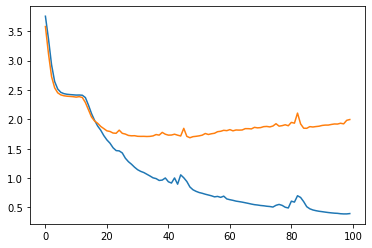

In [24]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.show()

In [ ]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.show()